# Energy consumption



In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data1=pd.read_excel(r"C:/Users/JAVEN1/Downloads/ENB2012_data.xlsx")

In [77]:
data1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

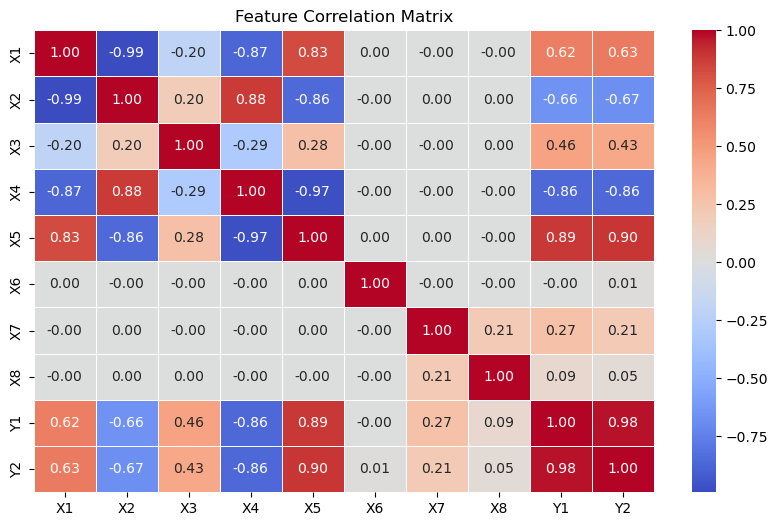

In [79]:
corr_matrix = data1.corr()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [80]:
data1.fillna(data1.median(), inplace=True)
data1.drop_duplicates(inplace=True)
data1.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
corr_matrix = data1.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
data1.drop(columns=to_drop, inplace=True)
X = data1.iloc[:, :-1]  # All columns except the last one as features
y = data1.iloc[:, -1]   # Last column as target
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [81]:
pca = PCA(n_components=0.95)  # Retains components explaining 95% of variance
X = pca.fit_transform(X)

In [82]:


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shape
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (614, 5), Testing set: (154, 5)


In [83]:
# Bagging with Random Forest
bagging_model = RandomForestRegressor(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
# Predictions
y_pred_bagging = bagging_model.predict(X_test)
# Evaluation
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
r2_bagging = r2_score(y_test, y_pred_bagging)
#accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging (Random Forest) -> RMSE: {rmse_bagging:.4f}, R2 Score: {r2_bagging:.4f}")



Bagging (Random Forest) -> RMSE: 0.5263, R2 Score: 0.9973


In [84]:
y_pred_bagging

array([15.7775, 13.1432, 32.7497, 41.9224, 16.7312, 23.1376, 24.3259,
       28.6369, 19.274 , 29.0942, 18.6304, 32.7177, 28.7927, 10.3749,
       17.9717, 36.6119, 36.0451, 12.1756, 14.5274, 33.1738, 29.1654,
       41.937 , 11.5918, 36.9371, 15.3109, 36.8236, 35.9757, 28.7787,
       17.3455, 14.2376, 10.417 , 12.4006, 16.6256, 27.0438, 35.2901,
       28.5951, 32.5136, 35.5274, 35.7928, 10.8738, 28.4347, 12.201 ,
        6.4252, 32.2651,  6.7902,  6.4278,  7.2831, 10.9078, 28.9552,
       32.5437, 35.0101, 12.8047, 12.8892, 38.4111, 12.2514, 15.2312,
       12.2977, 25.3774, 39.5589, 36.3589, 14.0461, 16.3337, 12.7695,
       23.9119, 28.6045, 36.9926, 37.0612, 11.583 , 12.9161, 11.9247,
       29.469 , 32.6442, 12.437 , 23.6951, 32.2551, 12.2645, 29.2972,
       25.7217, 32.4014, 19.3277, 24.3102, 38.9633, 10.6042, 14.3041,
       11.5153, 12.9678, 26.0794, 36.6838, 35.3631, 17.4311, 15.3149,
       25.9153, 11.163 , 12.9566, 36.3161, 12.808 , 26.3959, 29.0954,
       10.7166, 10.8

In [85]:
y_test

668    16.47
324    13.17
624    32.82
690    41.32
473    16.69
       ...  
355    38.98
534    36.66
344    29.34
296    29.54
462    12.17
Name: Y1, Length: 154, dtype: float64

In [86]:
# Define base learners
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]
# Define Meta-learner
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=XGBRegressor())
# Train Stacking Model
stacking_model.fit(X_train, y_train)
# Predictions
y_pred_stacking = stacking_model.predict(X_test)
# Evaluation
rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
r2_stacking = r2_score(y_test, y_pred_stacking)
print(f"Stacking -> RMSE: {rmse_stacking:.4f}, R2 Score: {r2_stacking:.4f}")


Stacking -> RMSE: 0.6046, R2 Score: 0.9965


In [87]:
import numpy as np
def regression_accuracy(y_true, y_pred, tolerance=0.05):
    correct = np.abs(y_true - y_pred) <= (tolerance * np.abs(y_true))
    return np.mean(correct)
# Compute accuracy for Bagging
accuracy_bagging = regression_accuracy(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging*100:.4f}")
# Compute accuracy for Stacking
accuracy_stacking = regression_accuracy(y_test, y_pred_stacking)
print(f"Stacking Accuracy: {accuracy_stacking*100:.4f}")


Bagging Accuracy: 99.3506
Stacking Accuracy: 91.5584
